In [5]:
using PyPlot, SeisPlot
using FFTW
using LinearAlgebra
using SeisProcessing


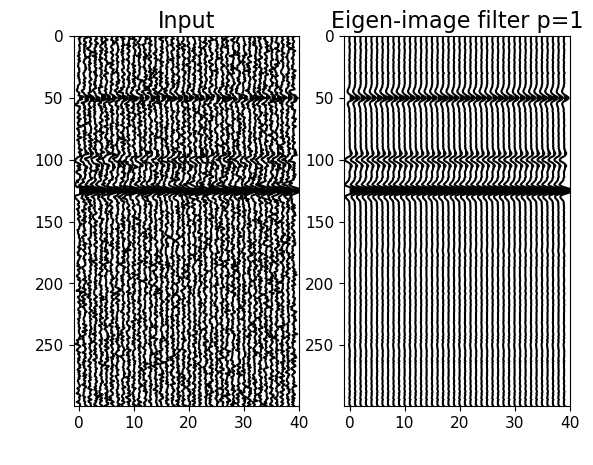

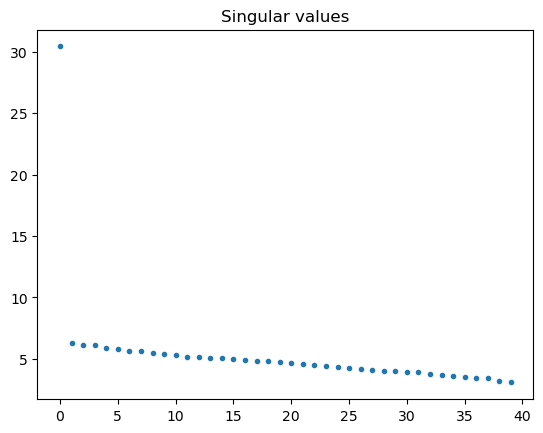

In [33]:
# Sythetic data 3D 

nt = 300
nx1 = 40
nx2 = 1

Par = Dict(:ot => 0.0, :dt => 0.004, :nt => nt, :ox1 => 0.0, :dx1 => 10.0,
    :nx1 => nx1, :ox2 => 0.0, :dx2 => 1.0, :nx2 =>  nx2, :ox3 => 0.0, :dx3 => 10.0,
    :nx3 => 1, :ox4 => 0.0, :dx4 => 10.0, :nx4 => 1, :tau => [.2, .4, 0.5],
    :p1 => [0.0, 0.0, 0.0], :p2 => [0.0, 0.0, 0.0], :p3 => [0.0, 0.0, 0.0],
    :p4 => [0.0, 0.0, 0.0], :xref => 1000.0, :amp => [1.0, -1.0, 2.0],
    :f0 => 20.0);

D = SeisParabEvents(; Par...)
SNR = 1.0
Dn = SeisAddNoise(D, SNR)
F = svd(Dn)
p=1
U=(F.U)[:,1:p]
Df = U*U'*Dn
figure(1)
subplot(121);SeisPlotTX(style="wiggles",Dn,fignum=1,title="Input",xcur=2)
subplot(122);SeisPlotTX(style="wiggles",Df,fignum=1,title="Eigen-image filter p=1",xcur=2)

savefig("eigen_ok.png")
figure(2)
plot(F.S,".");title("Singular values")
savefig("sing_ok.png")